In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("epi_nd-gain.csv")
print(df.shape)
df.head()

(187, 63)


,code,iso,country,AMP,APR,BCA,BHV,BLC,CDA,CDO,...,TCC,TCL,USD,UWD,VOE,WL5,WTA,WTL,WWT,nd-gain
0,4,AFG,Afghanistan,0.000000,13.134830,0.021409,0.418988,14.917438,-0.051453,9780.0,...,39.0,0.000060,466.408266,674.481233,0.015732,0.000000,71.499301,0.000000,0.000000,low
1,8,ALB,Albania,178.803804,9.532294,-0.111462,0.348171,0.945792,0.011736,5560.0,...,1241.0,0.002041,39.412070,116.095860,0.009952,0.738103,56.010690,0.002602,0.018530,normal
2,12,DZA,Algeria,26.558865,1.273220,0.006700,0.596696,69.293182,0.047309,184000.0,...,14169.0,0.011911,39.637104,127.632487,0.021838,0.000000,21.748026,0.000000,0.331200,normal
3,24,AGO,Angola,1.400940,0.083847,0.015176,0.614766,27.555363,0.016730,27000.0,...,298827.0,0.004250,1453.097805,2329.179532,0.064238,0.000000,7178.013668,0.000000,0.000000,low
4,28,ATG,Antigua and Barbuda,291.127316,9.924773,0.003106,0.339933,0.034825,0.019086,537.0,...,15.0,0.002896,46.832324,174.021747,0.001167,0.000000,22.476116,0.000000,0.157115,normal


In [18]:
# For generating the sample dataset image.
# This is not used elsewhere.

subset_columns = list(df.columns[:8]) + list(df.columns[-4:])
df[subset_columns].head()

,code,iso,country,AMP,APR,BCA,BHV,BLC,WTA,WTL,WWT,nd-gain
0,4,AFG,Afghanistan,0.000000,13.134830,0.021409,0.418988,14.917438,71.499301,0.000000,0.000000,low
1,8,ALB,Albania,178.803804,9.532294,-0.111462,0.348171,0.945792,56.010690,0.002602,0.018530,normal
2,12,DZA,Algeria,26.558865,1.273220,0.006700,0.596696,69.293182,21.748026,0.000000,0.331200,normal
3,24,AGO,Angola,1.400940,0.083847,0.015176,0.614766,27.555363,7178.013668,0.000000,0.000000,low
4,28,ATG,Antigua and Barbuda,291.127316,9.924773,0.003106,0.339933,0.034825,22.476116,0.000000,0.157115,normal


##### Per the note in the instructions, this will use sklearn with purely numeric data to implement Naive Bayes classification

In [ ]:
# Separate into data and target while removing extra information
X = df.drop(columns=["code", "iso", "country", "nd-gain"])
y = df["nd-gain"]

# Convert target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scale values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size = 0.2, random_state = 0)

# Execute model training
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

[1 2 2 1 2 2 2 0 0 2 2 1 2 0 0 2 1 2 2 2 2 1 2 2 1 1 2 1 1 0 2 1 2 1 0 2 2
 1 1 1 2 2 2 2 0 1 0 2 2 2 2 1 1 1 0 2 0 0 1 1 2 1 0 2 2 2 2 2 1 2 1 1 2 0
 2 2 2 2 0 0 2 2 2 0 2 2 1 2 0 2 2 1 2 2 2 1 2 0 0 1 1 2 2 1 2 1 2 2 2 2 2
 2 1 2 2 2 2 0 1 0 1 1 1 0 1 2 2 1 2 1 2 2 2 0 0 1 2 2 2 2 2 2 2 2 2 1 2 2
 1 0 2 2 0 1 2 1 0 1 2 2 0 0 1 2 2 2 1 2 0 2 2 1 2 1 2 2 2 0 1 0 1 2 2 1 2
 1 2]


In [27]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = "weighted")
recall = recall_score(y_test, y_pred, average = "weighted")
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Recall:   ", recall)

Accuracy:  0.8157894736842105
F1 Score:  0.8146341463414634
Recall:    0.8157894736842105


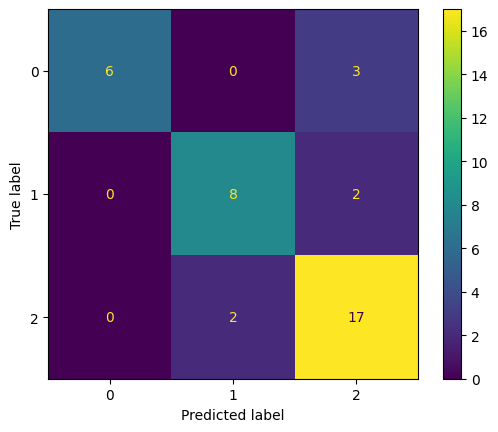

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot()